# SSP Analysis with auto_ssp_elines_rnd()

In [1]:
#########################################################################
#
# --= pyFIT3D Auto SSP analysis =--
#
# Let's run the analysis of the central (5"x5") spectra of galaxy NGC5947
#
from pyFIT3D.common.auto_ssp_tools import auto_ssp_elines_rnd

# See the similar script to run the analysis with intrumental dispersion: 
#      bin/auto_ssp_elines_rnd_sigma_inst.py
#

name = 'NGC5947'
spec_file = f'{name}.spec_5.txt'

# using the initial values:
#
# Instrumental dispersion: 2.6 AA
sigma_inst = 2.6 

# Masks:
#     File with list of ranges of wavelength to be masked in whole analysis
mask_list = 'mask_elines.txt'

######################
######################
# Non linear analysis: (redshift, observed dispersion and dust attenuation)
#     wavelength range: 
#         [3800, 4700] AA for the redshift and sigma analysis
#         [3800, 7000] AA for the dust attenuation
w_min_max = [3800, 7000]
nl_w_min_max = [3800, 4700]

#     models:
#         GSD01 3 models
ssp_nl_fit_file = 'gsd01_3.fits'

#     emission lines to be masked:
elines_mask_file = 'emission_lines.txt'

#     redshift:
#         initial value: 0.0195
#                 delta: 0.0001
#                   min: 0.0170
#                   max: 0.0225
redshift_set = [0.0195, 0.0001, 0.0170, 0.0225]

#     dispersion: (km/s)
#         initial value: 30
#                 delta: 20
#                   min: 1
#                   max: 350
sigma_set = [30, 10, 1, 350]

#     dust attenuation at V band (mag):
#         initial value: 0.3
#                 delta: 0.15
#                   min: 0
#                   max: 1.6
AV_set = [0.1, 0.05, 0, 2]

# SSP analysis:
#     wavelength range: 
#         [3800, 7000] AA
#
#     models:
#         GSD01 156 models
ssp_file = 'gsd01_156.fits'

#     configuration file:
config_file = 'auto_ssp.config'

# final output file:
out_file = f'auto_ssp_with_files.{name}.cen.out'

# run auto_ssp_elines_rnd_sigma_inst
auto_ssp_elines_rnd(
    spec_file=spec_file, 
    ssp_file=ssp_file, 
    ssp_nl_fit_file=ssp_nl_fit_file, 
    
    sigma_inst=sigma_inst, 
    
    out_file=out_file, 
    config_file=config_file, 
    
    mask_list=mask_list, 
    elines_mask_file=elines_mask_file, 
    
    min=-3, max=50, 
    
    w_min=w_min_max[0], w_max=w_min_max[1], 
    nl_w_min=nl_w_min_max[0], nl_w_max=nl_w_min_max[1], 
    
    input_redshift=redshift_set[0], delta_redshift=redshift_set[1], min_redshift=redshift_set[2], max_redshift=redshift_set[3], 
    input_sigma=sigma_set[0], delta_sigma=sigma_set[1], min_sigma=sigma_set[2], max_sigma=sigma_set[3], 
    input_AV=AV_set[0], delta_AV=AV_set[1], min_AV=AV_set[2], max_AV=AV_set[3], 
    
    plot=0
) 

# TIME 2021-10-04 21:05:40 (random number generator seed: 1633399540)

---[ StPopSynt ]----------------------------------------------------------
| Input config: 
| - MIN_DELTA_CHI_SQ = 0.0001
| - MAX_N_ITER = 1
| - CUT_MEDIAN_FLUX = 0.0
| - Wavelength range - [3800.00, 7000.00] - Non-linear analysis: [3800.00, 4700.00]
| - Instrumental dispersion: 2.6
| - Redshift - guess:0.019500 delta:0.000100 min:0.017000 max:0.022500
| - Sigma    - guess:30.000000 delta:10.000000 min:1.000000 max:350.000000
| - AV       - guess:0.100000 delta:0.050000 min:0.000000 max:2.000000
--------------------------------------------------------------------------
| Emission lines analysis:
| - Number of systems = 6
| - wavelength range: 6530-6750 - config file: Ha_NII.config
| - wavelength range: 4800-5200 - config file: OIII_V500.config
| - wavelength range: 6730-6950 - config file: SII_V500.config
| - wavelength range: 4310-4500 - config file: Hg_V500.config
| - wavelength range: 4095-4250 - config file: Hd_

## Reading the output spectra:

In [2]:
# read output fits
from pyFIT3D.common.io import get_data_from_fits

data__tw, h = get_data_from_fits(f'output.{out_file}.fits', header=True)

In [3]:
# output FITS file header information
h

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1877                                                  
NAXIS2  =                    6                                                  
EXTEND  =                    T                                                  
PIPELINE= 'pyPipe3D v1.1.0'                                                     
UNIXTIME=           1633399564 / 2021-10-04 21:06:04.131402                     
CRPIX1  =                    1                                                  
CRVAL1  =               3749.0                                                  
CDELT1  =                  2.0                                                  
NAME0   = 'org_spec'                                                            
NAME1   = 'model_spec'      

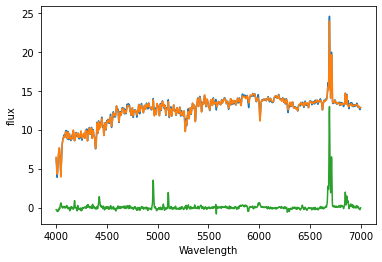

In [4]:
# define spectra and wavelength axis
from pyFIT3D.common.io import get_wave_from_header

wave__w = get_wave_from_header(h, wave_axis=1)

flux_org__w = data__tw[0]
model__w = data__tw[2]
res__w = data__tw[3]

# plot spectra
import numpy as np
import matplotlib.pyplot as plt

sel__w = (wave__w > 4000) & (wave__w < 7000)
plt.xlabel('Wavelength')
plt.ylabel('flux')
plt.plot(wave__w[sel__w], flux_org__w[sel__w], wave__w[sel__w], model__w[sel__w], wave__w[sel__w], res__w[sel__w])

## Let's fit the [NII] + H$\alpha$ system of emission lines

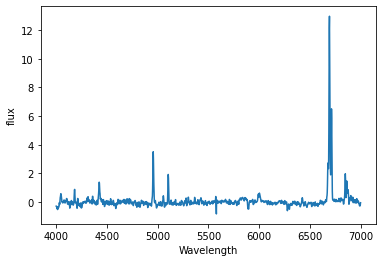

In [5]:
# Gas spectrum
gas__w = data__tw[3]

plt.xlabel('Wavelength')
plt.ylabel('flux')
plt.plot(wave__w[sel__w], gas__w[sel__w])

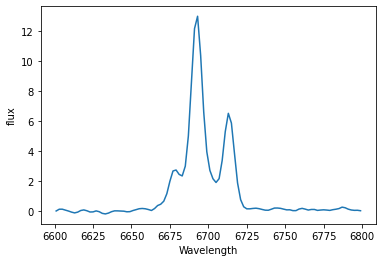

In [6]:
# [NII]+[Ha] system
wl_br = [6600, 6800]
wlb = wl_br[0]
wlr = wl_br[1]
sel__w = (wave__w > wlb) & (wave__w < wlr)
plt.xlabel('Wavelength')
plt.ylabel('flux')
plt.plot(wave__w[sel__w], gas__w[sel__w])

In [7]:
# The system velocity should be around:
from pyFIT3D.common.constants import __c__

obs_Ha_center = wave__w[sel__w][np.argmax(gas__w[sel__w])]
rest_Ha_center = 6562.82
sys_vel = __c__*(obs_Ha_center - rest_Ha_center)/rest_Ha_center
print(f'sys_vel: {sys_vel}')

sys_vel: 5946.678742132207


In [8]:
##################################
#
# output the [NII]+[Ha] spectrum
#
from pyFIT3D.common.io import output_spectra
from pyFIT3D.common.stats import pdl_stats, _STATS_POS

system_wave__w = wave__w[sel__w]
system_flux__w = gas__w[sel__w]

# simulate an input error
system_res__w = data__tw[4, sel__w]
st_res = pdl_stats(system_res__w)
system_eflux__w = 0.1*st_res[_STATS_POS['pRMS']]*system_flux__w

# output spectra
filename = f'NII_Ha.{name}.txt'
output_spectra(system_wave__w, [system_flux__w, system_eflux__w], filename=filename)

In [9]:
cat {filename}

1 6601 0.00911986607835935104 0.000284907344731132517
2 6603 0.126122321636676915 0.0039400990606756588
3 6605 0.127906839742532696 0.00399584794018721656
4 6607 0.066360238879827449 0.00207311371598304772
5 6609 0.00609304009917721601 0.000190348395588413251
6 6611 -0.0660439811169233337 -0.00206323372885325578
7 6613 -0.118117491742756542 -0.00369002577993823681
8 6615 -0.0667888614305294226 -0.00208650401270046989
9 6617 0.0414971124768399591 0.00129638220870810527
10 6619 0.0797892137861140327 0.00249263890967968763
11 6621 0.0241694581686200394 0.000755061104104557887
12 6623 -0.0584967452274742783 -0.00182745582171656823
13 6625 -0.0512678531788459679 -0.00160162307140789256
14 6627 0.0145506662055652214 0.000454567165468990682
15 6629 -0.0387879940987119198 -0.00121174854007274012
16 6631 -0.149570436689106856 -0.00467262519002203686
17 6633 -0.186084601400516192 -0.00581333861976072921
18 6635 -0.132556717924270373 -0.00414111152571570388
19 6637 -0.0385886889705666647 -0.00120

# Fitting emission lines with RND mode

In [10]:
#####################################################################
#
# --= pyFIT3D fit elines analysis =--
#
# Let's run the analysis of the NII+Ha system of the previous spectra
from pyFIT3D.common.gas_tools import fit_elines

# models: Ha + [NII]6583 + [NII]6548 + continuum
#     config file with models to fit:
config_filename = 'Ha_NII.config'
name='NGC5947'
# output filename 
output_filename = f'fit_elines_rnd_NII_Ha.{name}.out'

fit_elines(
    spec_file=filename,
    config_file=config_filename,
    w_min=wlb, w_max=wlr,
    redefine_max=1,
    n_MC=20, n_loops=5, plot=0, scale_ini=0.15,
    out_file=output_filename,
    run_mode='RND',
)


# TIME 2021-10-04 21:06:05 (random number generator seed: 1633399565)

ipykernel_launcher.py: no mask list file
0 regions to mask
-> real number of loops = 144
-> number of models = 4 | chi^2 = 506.15328099820914
         -------------------------------------------------------------------------------------------------
         |         wave          |         flux          |         sigma         |          vel          |
----------------------------------------------------------------------------------------------------------
|  eline | 6562.8200 +/-  0.0000 |  138.9490 +/-  6.5221 |    4.7992 +/-  0.0646 | 5871.4720 +/- 11.2029 |
|  eline | 6583.6000 +/-  0.0000 |   68.2745 +/-  6.4148 |    4.7992 +/-  0.0646 | 5871.4720 +/- 11.2029 |
|  eline | 6548.0000 +/-  0.0000 |   22.7354 +/-  6.3932 |    4.7992 +/-  0.0646 | 5871.4720 +/- 11.2029 |
----------------------------------------------------------------------------------------------------------
         |        coeff0         |
---

## Reading results from output file

In [11]:
from pyFIT3D.common.gas_tools import read_fit_elines_output

n_models_rnd, chi_sq_rnd, elsystems = read_fit_elines_output(output_filename, verbose=1)

Number of eline models = 3
Number of poly1d models = 1


In [12]:
models = elsystems[0]
i_Ha = 0
i_NII_red = 1
i_NII_blue = 2
i_cont = 0
flux = models['flux']
e_flux = models['e_flux']
v0 = models['v0']
e_v0 = models['e_v0']
disp = models['disp']
e_disp = models['e_disp']
cont = models['cont']
e_cont = models['e_cont']

In [13]:
# comparing the calculated system velocity and the measured one:
print(f'calc sys vel: {sys_vel}')
print(f"derived velocity: {models['v0'][i_Ha]}")

calc sys vel: 5946.678742132207
derived velocity: 5871.472


In [14]:
print(f'Number of models: {n_models_rnd} - fit chi squared: {chi_sq_rnd}')
print(f'Ha:')
print(f"\t integrated flux: {flux[i_Ha]:.4f} +/- {e_flux[i_Ha]:.4f}")
print(f"\t        velocity: {v0[i_Ha]:.4f} +/- {e_v0[i_Ha]:.4f}")
print(f"\t      dispersion: {disp[i_Ha]:.4f} +/- {e_disp[i_Ha]:.4f}")
print(f'[NII]6583:')
print(f"\t integrated flux: {flux[i_NII_red]:.4f} +/- {e_flux[i_NII_red]:.4f}")
print(f"\t        velocity: {v0[i_NII_red]:.4f} +/- {e_v0[i_NII_red]:.4f}")
print(f"\t      dispersion: {disp[i_NII_red]:.4f} +/- {e_disp[i_NII_red]:.4f}")
print(f'[NII]6548')
print(f"\t integrated flux: {flux[i_NII_red]:.4f} +/- {e_flux[i_NII_red]:.4f}")
print(f"\t        velocity: {v0[i_NII_red]:.4f} +/- {e_v0[i_NII_red]:.4f}")
print(f"\t      dispersion: {disp[i_NII_red]:.4f} +/- {e_disp[i_NII_red]:.4f}")
print(f'continuum:')
print(f"\t integrated flux: {cont[0]:.4f} +/- {e_cont[0]:.4f}")

Number of models: [4] - fit chi squared: [506.15328099820914]
Ha:
	 integrated flux: 138.9490 +/- 6.5221
	        velocity: 5871.4720 +/- 11.2029
	      dispersion: 11.3013 +/- 0.1521
[NII]6583:
	 integrated flux: 68.2745 +/- 6.4148
	        velocity: 5871.4720 +/- 11.2029
	      dispersion: 11.3013 +/- 0.1521
[NII]6548
	 integrated flux: 68.2745 +/- 6.4148
	        velocity: 5871.4720 +/- 11.2029
	      dispersion: 11.3013 +/- 0.1521
continuum:
	 integrated flux: 0.0425 +/- 0.0109


# Fitting emission lines with LM mode

In [15]:
# Perform the fit again with Levemberg-Marquadt minimization technique
# using the rnd output values as input values for the models.
config_filename = 'out_config.fit_spectra'  # file generated by fit_elines_rnd()

# output filename 
output_filename = f'fit_elines_LM_NII_Ha.{name}.out'

fit_elines(
    spec_file=filename,
    config_file=config_filename,
    w_min=wlb, w_max=wlr,
    n_MC=20, n_loops=5, plot=0, scale_ini=0.15,
    out_file=output_filename,  
    run_mode='LM',
)

# TIME 2021-10-04 21:06:05 (random number generator seed: 1633399565)

ipykernel_launcher.py: no mask list file
0 regions to mask
-> number of models = 4 | chi^2 = 453.5729503730757
         -------------------------------------------------------------------------------------------------
         |         wave          |         flux          |         sigma         |          vel          |
----------------------------------------------------------------------------------------------------------
|  eline | 6562.8200 +/-  0.0000 |  130.3874 +/-  0.7333 |    4.4086 +/-  0.0138 | 5891.1976 +/-  0.5569 |
|  eline | 6583.6000 +/-  0.0000 |   59.9127 +/-  0.6131 |    4.4086 +/-  0.0138 | 5891.1976 +/-  0.5569 |
|  eline | 6548.0000 +/-  0.0000 |   19.9509 +/-  0.2042 |    4.4086 +/-  0.0138 | 5891.1976 +/-  0.5569 |
----------------------------------------------------------------------------------------------------------
         |        coeff0         |
----------------------------------

In [16]:
n_models_LM, chi_sq_LM, elsystems = read_fit_elines_output(output_filename, verbose=1)

models = elsystems[0]
i_Ha = 0
i_NII_red = 1
i_NII_blue = 2
i_cont = 0
flux = models['flux']
e_flux = models['e_flux']
v0 = models['v0']
e_v0 = models['e_v0']
disp = models['disp']
e_disp = models['e_disp']
cont = models['cont']
e_cont = models['e_cont']
print(f'Number of models: {n_models_rnd} - fit chi squared: {chi_sq_rnd}')
print(f'Ha:')
print(f"\t integrated flux: {flux[i_Ha]:.4f} +/- {e_flux[i_Ha]:.4f}")
print(f"\t        velocity: {v0[i_Ha]:.4f} +/- {e_v0[i_Ha]:.4f}")
print(f"\t      dispersion: {disp[i_Ha]:.4f} +/- {e_disp[i_Ha]:.4f}")
print(f'[NII]6583:')
print(f"\t integrated flux: {flux[i_NII_red]:.4f} +/- {e_flux[i_NII_red]:.4f}")
print(f"\t        velocity: {v0[i_NII_red]:.4f} +/- {e_v0[i_NII_red]:.4f}")
print(f"\t      dispersion: {disp[i_NII_red]:.4f} +/- {e_disp[i_NII_red]:.4f}")
print(f'[NII]6548')
print(f"\t integrated flux: {flux[i_NII_red]:.4f} +/- {e_flux[i_NII_red]:.4f}")
print(f"\t        velocity: {v0[i_NII_red]:.4f} +/- {e_v0[i_NII_red]:.4f}")
print(f"\t      dispersion: {disp[i_NII_red]:.4f} +/- {e_disp[i_NII_red]:.4f}")
print(f'continuum:')
print(f"\t integrated flux: {cont[0]:.4f} +/- {e_cont[0]:.4f}")

Number of eline models = 3
Number of poly1d models = 1
Number of models: [4] - fit chi squared: [506.15328099820914]
Ha:
	 integrated flux: 130.3874 +/- 0.7333
	        velocity: 5891.1976 +/- 0.5569
	      dispersion: 10.3815 +/- 0.0325
[NII]6583:
	 integrated flux: 59.9127 +/- 0.6131
	        velocity: 5891.1976 +/- 0.5569
	      dispersion: 10.3815 +/- 0.0325
[NII]6548
	 integrated flux: 59.9127 +/- 0.6131
	        velocity: 5891.1976 +/- 0.5569
	      dispersion: 10.3815 +/- 0.0325
continuum:
	 integrated flux: 0.0420 +/- 0.0001


# Fitting emission lines with dual mode (both)

In [17]:
# This dual process of fitting with rnd and after with the LM method 
# could be mimic by using the mode 'both':
# models: Ha + [NII]6583 + [NII]6548 + continuum
#     config file with models to fit:
config_filename = 'Ha_NII.config'

# output filename 
output_filename = f'fit_elines_mixed_NII_Ha.{name}.out'

fit_elines(
    spec_file=filename,
    config_file=config_filename,
    w_min=wlb, w_max=wlr,
    redefine_max=1,
    n_MC=20, n_loops=5, plot=0, scale_ini=0.15,
    out_file=output_filename, 
    run_mode='BOTH'
)

# TIME 2021-10-04 21:06:05 (random number generator seed: 1633399565)

ipykernel_launcher.py: no mask list file
0 regions to mask
-> real number of loops = 144
-> number of models = 4 | chi^2 = 506.15328099820914
         -------------------------------------------------------------------------------------------------
         |         wave          |         flux          |         sigma         |          vel          |
----------------------------------------------------------------------------------------------------------
|  eline | 6562.8200 +/-  0.0000 |  138.9490 +/-  6.5221 |    4.7992 +/-  0.0646 | 5871.4720 +/- 11.2029 |
|  eline | 6583.6000 +/-  0.0000 |   68.2745 +/-  6.4148 |    4.7992 +/-  0.0646 | 5871.4720 +/- 11.2029 |
|  eline | 6548.0000 +/-  0.0000 |   22.7354 +/-  6.3932 |    4.7992 +/-  0.0646 | 5871.4720 +/- 11.2029 |
----------------------------------------------------------------------------------------------------------
         |        coeff0         |
---

In [18]:
n_models_both, chi_sq_both, elsystems = read_fit_elines_output(output_filename, verbose=1)

models = elsystems[0]
i_Ha = 0
i_NII_red = 1
i_NII_blue = 2
i_cont = 0
flux = models['flux']
e_flux = models['e_flux']
v0 = models['v0']
e_v0 = models['e_v0']
disp = models['disp']
e_disp = models['e_disp']
cont = models['cont']
e_cont = models['e_cont']
print(f'Number of models: {n_models_rnd} - fit chi squared: {chi_sq_rnd}')
print(f'Ha:')
print(f"\t integrated flux: {flux[i_Ha]:.4f} +/- {e_flux[i_Ha]:.4f}")
print(f"\t        velocity: {v0[i_Ha]:.4f} +/- {e_v0[i_Ha]:.4f}")
print(f"\t      dispersion: {disp[i_Ha]:.4f} +/- {e_disp[i_Ha]:.4f}")
print(f'[NII]6583:')
print(f"\t integrated flux: {flux[i_NII_red]:.4f} +/- {e_flux[i_NII_red]:.4f}")
print(f"\t        velocity: {v0[i_NII_red]:.4f} +/- {e_v0[i_NII_red]:.4f}")
print(f"\t      dispersion: {disp[i_NII_red]:.4f} +/- {e_disp[i_NII_red]:.4f}")
print(f'[NII]6548')
print(f"\t integrated flux: {flux[i_NII_red]:.4f} +/- {e_flux[i_NII_red]:.4f}")
print(f"\t        velocity: {v0[i_NII_red]:.4f} +/- {e_v0[i_NII_red]:.4f}")
print(f"\t      dispersion: {disp[i_NII_red]:.4f} +/- {e_disp[i_NII_red]:.4f}")
print(f'continuum:')
print(f"\t integrated flux: {cont[0]:.4f} +/- {e_cont[0]:.4f}")

Number of eline models = 3
Number of poly1d models = 1
Number of models: [4] - fit chi squared: [506.15328099820914]
Ha:
	 integrated flux: 138.9490 +/- 6.5221
	        velocity: 5871.4720 +/- 11.2029
	      dispersion: 11.3013 +/- 0.1521
[NII]6583:
	 integrated flux: 68.2745 +/- 6.4148
	        velocity: 5871.4720 +/- 11.2029
	      dispersion: 11.3013 +/- 0.1521
[NII]6548
	 integrated flux: 68.2745 +/- 6.4148
	        velocity: 5871.4720 +/- 11.2029
	      dispersion: 11.3013 +/- 0.1521
continuum:
	 integrated flux: 0.0425 +/- 0.0109
